# PROYEK ANALISIS DATA: Air Quality

**Nama:** Muhammad Faisal Aktsa  
**Email:** fslfaisal17@gmail.com  
**ID Dicoding:** fslmc17  

# MENENTUKAN PERTANYAAN BISNIS
- Pada bulan dan musim apa tingkat PM2.5 dan PM10 paling tinggi, dan bagaimana faktor cuaca (suhu, tekanan udara, kelembapan, curah hujan, kecepatan angin) berkontribusi terhadap peningkatan PM2.5 dan PM10?
- Stasiun mana yang konsisten melebihi standar O3 harian (WHO: 100μg/m³) selama 3 tahun terakhir?

# IMPORT SEMUA LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

# DATA WRANGLING

## GATHERING DATA

In [2]:
# GATHERING DATA
df_aotizhongxin = pd.read_csv("dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv", delimiter=",")
df_changpin = pd.read_csv("dataset/PRSA_Data_Changping_20130301-20170228.csv", delimiter=",")
df_dingling = pd.read_csv("dataset/PRSA_Data_Dingling_20130301-20170228.csv", delimiter=",")
df_dongsi = pd.read_csv("dataset/PRSA_Data_Dongsi_20130301-20170228.csv", delimiter=",")
df_guanyuan = pd.read_csv("dataset/PRSA_Data_Guanyuan_20130301-20170228.csv", delimiter=",")
df_gucheng = pd.read_csv("dataset/PRSA_Data_Gucheng_20130301-20170228.csv", delimiter=",")
df_huairou = pd.read_csv("dataset/PRSA_Data_Huairou_20130301-20170228.csv", delimiter=",")
df_nongzhanguan = pd.read_csv("dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv", delimiter=",")
df_shunyi = pd.read_csv("dataset/PRSA_Data_Shunyi_20130301-20170228.csv", delimiter=",")
df_tiantan = pd.read_csv("dataset/PRSA_Data_Tiantan_20130301-20170228.csv", delimiter=",")
df_wanliu = pd.read_csv("dataset/PRSA_Data_Wanliu_20130301-20170228.csv", delimiter=",")
df_wanshouxigong = pd.read_csv("dataset/PRSA_Data_Wanshouxigong_20130301-20170228.csv", delimiter=",")

dataframes = [
    df_aotizhongxin, df_changpin, df_dingling, df_dongsi, df_guanyuan,
    df_gucheng, df_huairou, df_nongzhanguan, df_shunyi, df_tiantan,
    df_wanliu, df_wanshouxigong
]

all_df = pd.concat(dataframes, ignore_index=True) # Menggabungkan semua dataframe menjadi satu variabel
all_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


## ASSESSING DATA

In [3]:
# ASSESSING DATA
all_df.info() # Hasilnya, ada data yang null. dan format dari kolom year, month, day, hour, bisa diubah ke datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [4]:
all_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [5]:
print("Jumlah Duplikasi: ", all_df.duplicated().sum()) # Hasilnya, tidak ada data yang terduplikasi
all_df.describe() 
# Hasilnya, ada kemungkinan outlier pada pm2.5, pm10, SO2, NO2, CO, O3, kemungkinan kesalahan sensor. Mungkin TEMP Juga

Jumlah Duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


## CLEANING DATA

In [6]:
# CLEANING DATA

# 1. Mengubah format ke datetime
all_df['datetime'] = pd.to_datetime(all_df[['year', 'month', 'day', 'hour']])
all_df = all_df.drop(columns=['year', 'month', 'day', 'hour'])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   PM2.5     412029 non-null  float64       
 2   PM10      414319 non-null  float64       
 3   SO2       411747 non-null  float64       
 4   NO2       408652 non-null  float64       
 5   CO        400067 non-null  float64       
 6   O3        407491 non-null  float64       
 7   TEMP      420370 non-null  float64       
 8   PRES      420375 non-null  float64       
 9   DEWP      420365 non-null  float64       
 10  RAIN      420378 non-null  float64       
 11  wd        418946 non-null  object        
 12  WSPM      420450 non-null  float64       
 13  station   420768 non-null  object        
 14  datetime  420768 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 48.2+ MB


In [7]:
# 2. Menangani Innacurate Value
    # Drop innacurate values berdasarkan stasiun

columns_to_drop = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
def hapus_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5*IQR)
    minimum = Q1 - (1.5*IQR)

    kondisi_lower_than = df[column] < minimum
    kondisi_more_than = df[column] > maximum

    df.drop(df[kondisi_lower_than].index, inplace=True)
    df.drop(df[kondisi_more_than].index, inplace=True)

    return df

for index in columns_to_drop:
    all_df = all_df.groupby('station').apply(hapus_outlier, column=index).reset_index(drop=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15964\853595859.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_df = all_df.groupby('station').apply(hapus_outlier, column=index).reset_index(drop=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15964\853595859.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_df = all_df.groupby('station').apply(hapus_outlier, column=index).reset_index(drop=Tr

In [8]:
    # Imuputation semua Missing Values, berdasarkan masing masing stasiun. Kecuali wd, wd diberi 'unknown'
columns_to_drop.extend(['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'])
columns_to_impute = columns_to_drop

all_df['wd'].fillna('Unknown', inplace=True)

for index in columns_to_impute:
        all_df[index] = all_df.groupby('station')[index].transform(lambda x: x.fillna(x.median()))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15964\1893124021.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df['wd'].fillna('Unknown', inplace=True)


In [9]:
all_df.to_csv('cleaned_data.csv', index=False)

# Exploratory Data Analysis (EDA)

In [10]:
df = pd.read_csv("cleaned_data.csv", delimiter=",")

In [11]:
df.describe(include="all")

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,323903.000000,323903.000000,323903.000000,323903.000000,323903.000000,323903.000000,323903.000000,323903.000000,323903.000000,323903.000000,323903.000000,323903,323903.000000,323903,323903
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,12,32322
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Dongsi,2017-02-28 23:00:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33259,NaN,27873,12
mean,17893.520752,52.730366,74.713023,8.822225,41.392033,813.651602,56.243431,14.627346,1010.328178,3.069565,0.075871,NaN,1.809114,NaN,NaN
std,10045.407702,47.240227,56.853141,9.027608,26.423652,493.303848,43.669601,10.882647,10.577353,14.306214,0.880772,NaN,1.297883,NaN,NaN
min,1.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,NaN
25%,9714.000000,16.000000,28.000000,2.000000,20.000000,400.000000,21.000000,5.400000,1001.800000,-9.400000,0.000000,NaN,0.900000,NaN,NaN
50%,18429.000000,39.000000,62.000000,5.000000,37.000000,700.000000,50.000000,16.500000,1009.400000,5.000000,0.000000,NaN,1.500000,NaN,NaN
75%,26824.000000,76.000000,108.000000,12.000000,58.000000,1100.000000,80.000000,23.600000,1018.600000,16.000000,0.000000,NaN,2.300000,NaN,NaN


In [12]:
df.groupby(by="station").agg({
    "PM2.5" : ["mean", "max", "median"],
    "PM10" : ["mean", "max", "median"],
    "O3" : ["mean", "max", "median"],
})

PM2.5                     PM10                       O3  \
                    mean    max median       mean    max median       mean   
station                                                                      
Aotizhongxin   54.278157  252.0   40.0  78.312079  303.0   64.0  56.856159   
Changping      45.368655  223.0   31.0  65.419891  252.0   53.0  56.327846   
Dingling       39.407021  211.0   25.0  54.882628  229.0   42.0  66.857405   
Dongsi         58.620683  264.0   44.0  79.972938  296.0   67.0  56.115454   
Guanyuan       55.693658  253.0   42.0  79.148831  290.0   67.0  55.764767   
Gucheng        58.158901  253.0   44.0  91.463904  325.0   79.0  58.051089   
Huairou        44.073763  219.0   30.0  61.631937  259.0   48.0  56.761676   
Nongzhanguan   55.945550  257.0   42.0  77.621679  288.0   66.0  57.882417   
Shunyi         52.958717  251.0   38.0  70.160551  279.0   57.0  52.398791   
Tiantan        55.129604  249.0   41.0  76.336860  274.0   66.0  53.283637   
Wanliu         55.606315  255.0   42.0  79.894424  300.0   67.0  48.773246   
Wanshouxigong  56.331480  255.0   43.0  79.962148  299.0   69.0  56.094158   

                             
                 max median  
station                      
Aotizhongxin   199.0   50.0  
Changping      173.0   51.0  
Dingling       169.0   65.0  
Dongsi         186.0   49.0  
Guanyuan       195.0   47.0  
Gucheng        199.0   52.0  
Huairou        178.0   53.0  
Nongzhanguan   199.0   51.0  
Shunyi         180.0   48.0  
Tiantan        195.0   46.0  
Wanliu         187.0   40.0  
Wanshouxigong  195.0   49.0

## QUESTION 1

Membuat Kolom Bulan dan Musim dan menganalisis PM2.5 & PM10 per musim <br>
Hasilnya rata rata tertinggi PM2.5 berada di musim 3 (Summer), dan paling rendah di 1 (Winter) <br>
Sedangkan untuk PM10, rata rata tertinggi berada di bulan 2 (Spring), dan terendah di 1 (winter) <br>
PM10 Memuncak tepat pada bulan April <br>
PM2.5 memuncak pada bulan juli

In [13]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.month
df['season'] = df['datetime'].dt.month % 12 // 3 + 1 #

pm_musim = df.groupby("season").agg({
    "PM2.5" : "mean",
    "PM10" : "mean"
}).reset_index()

monthly_pm = df.groupby('month').agg({
    'PM2.5': 'mean',
    'PM10': 'mean'
}).reset_index()

print(monthly_pm)

print(pm_musim)

    month      PM2.5        PM10
0       1  36.137976   52.134073
1       2  38.546556   52.076492
2       3  51.118599   85.559811
3       4  63.021571  101.148411
4       5  51.936554   89.760320
5       6  58.702137   75.835542
6       7  65.763660   78.305911
7       8  50.176677   66.947271
8       9  55.786425   73.665992
9      10  61.856979   82.594596
10     11  51.135313   70.252803
11     12  33.582671   50.921538
   season      PM2.5       PM10
0       1  36.155749  51.720271
1       2  55.726971  92.707035
2       3  58.085328  73.540015
3       4  56.594447  75.808598


Melihat Korelasi faktor cuaca dengan PM10 & PM2.5 <br>
Hasilnya yang memiliki korelasi terkuat, adalah DEWP (Kelembapan), dan itu termasuk kecil

In [14]:
df[['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

,PM2.5,PM10,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.822504,0.157177,-0.179959,0.365635,0.007633,-0.280993
PM10,0.822504,1.000000,0.162116,-0.193123,0.268420,-0.016456,-0.183504
TEMP,0.157177,0.162116,1.000000,-0.820395,0.819926,0.034832,-0.090386
PRES,-0.179959,-0.193123,-0.820395,1.000000,-0.756630,-0.061553,0.156359
DEWP,0.365635,0.268420,0.819926,-0.756630,1.000000,0.087995,-0.393275
RAIN,0.007633,-0.016456,0.034832,-0.061553,0.087995,1.000000,0.014746
WSPM,-0.280993,-0.183504,-0.090386,0.156359,-0.393275,0.014746,1.000000


Tren bulanan PM2.5 PM10 <br>
Hasilnya, PM10 Memuncak tepat pada bulan April <br>
PM2.5 memuncak pada bulan juli

## QUESTION 2

Menandai data O3 yang diatas batas 3 tahun terakhir

In [15]:
last_three_years = df['datetime'].dt.year.max() - 2

df_filtered = df[df['datetime'].dt.year >= last_three_years]

df_filtered['O3_over'] = df_filtered['O3'] > 100

df['O3_over'] = df['O3'] > 100

station_o3_exceed = df_filtered.groupby('station')['O3_over'].sum().reset_index()
station_o3_exceed.columns = ['station', 'exceed_days']
print(station_o3_exceed)

          station  exceed_days
0    Aotizhongxin         2721
1       Changping         1745
2        Dingling         2207
3          Dongsi         2220
4        Guanyuan         2400
5         Gucheng         2501
6         Huairou         1704
7    Nongzhanguan         2521
8          Shunyi         1643
9         Tiantan         2296
10         Wanliu         2043
11  Wanshouxigong         2441


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15964\5391117.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['O3_over'] = df_filtered['O3'] > 100


Mengurutkan Pelanggaran.
hasilnya, stasiun Nongzhanguan memiliki pelanggaran terbanyak

In [16]:
station_o3_exceed.sort_values(by='exceed_days', ascending=False)

,station,exceed_days
0,Aotizhongxin,2721
7,Nongzhanguan,2521
5,Gucheng,2501
11,Wanshouxigong,2441
4,Guanyuan,2400
9,Tiantan,2296
3,Dongsi,2220
2,Dingling,2207
10,Wanliu,2043
1,Changping,1745


Melihat Tren pelanggaran tingkat O3 3 tahun terakhir
Hasilnya, kebnayakan O3 melebihi batas pada musim Summer

In [17]:
df_filtered['year'] = df_filtered['datetime'].dt.year
print(df_filtered[df_filtered['O3_over']].groupby(['season', 'year', 'month']).size().reset_index(name='exceed_days'))

    season  year  month  exceed_days
0        1  2015      2           19
1        1  2016      2           29
2        1  2017      1           80
3        1  2017      2          210
4        2  2015      3          552
5        2  2015      4         1953
6        2  2015      5         2367
7        2  2016      3          388
8        2  2016      4         1470
9        2  2016      5         2519
10       3  2015      6         2135
11       3  2015      7         2409
12       3  2015      8         2522
13       3  2016      6         2486
14       3  2016      7         2069
15       3  2016      8         2166
16       4  2015      9         1312
17       4  2015     10          299
18       4  2015     11           21
19       4  2016      9         1176
20       4  2016     10          260


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15964\494950082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['datetime'].dt.year


## Insight
**PM2.5 dan PM10, yaitu parameter untuk Partikel Halus berukuran 2.5mm dan 10mm yang terdapat di udara**
- Baik PM10 maupun PM2.5, tidak ada faktor cuaca yang secara langsung mempengaruhi kenaikan kedua polutan tersebut
- Rata-rata PM10 memuncak pada musim Semi, dan PM2.5 memuncak pada musim Panas
- Rata-rata PM10 memuncak pada bulan , dan PM2.5 pada bulan Juli
--------
**O3, yaitu parameter Ground Level Ozone, polutan yang berasal dari mobil, fasilitas pembangkit listrik, boiler industri, fasilitas kimia**
- stasiun nongzhuan memiliki jumlah pelanggaran kadar O3 paling banyak
- Pelanggaran O3 seringkali terjadi pada musim panas

# Visualization & Explanatory Analysis

In [18]:
df = pd.read_csv("cleaned_data.csv", delimiter=",")
df['datetime'] = pd.to_datetime(df['datetime'])

## QUESTION 1

<function matplotlib.pyplot.show(close=None, block=None)>

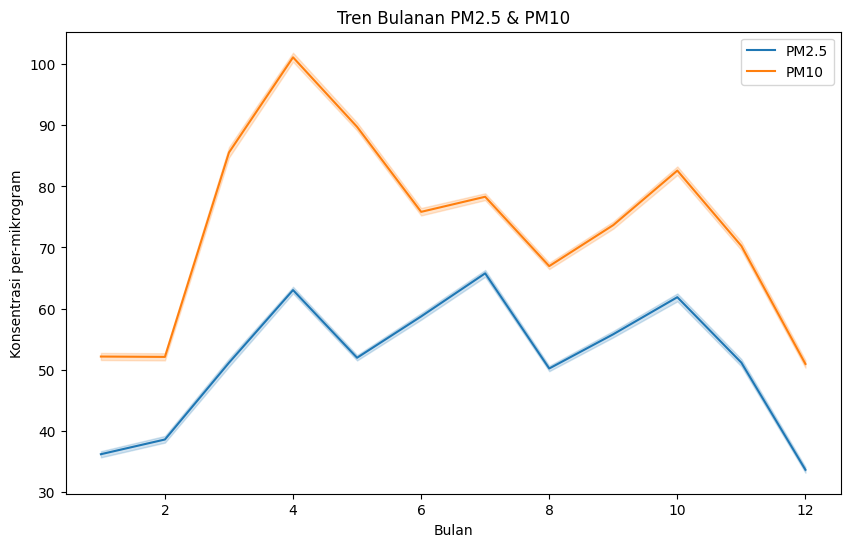

In [19]:
# QUESTION 1
df['month'] = df['datetime'].dt.month
df['season'] = df['datetime'].dt.month % 12 // 3 + 1

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='PM2.5', label='PM2.5')
sns.lineplot(data=df, x='month', y='PM10', label='PM10')
plt.title('Tren Bulanan PM2.5 & PM10')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi per-mikrogram')
plt.legend()
plt.show

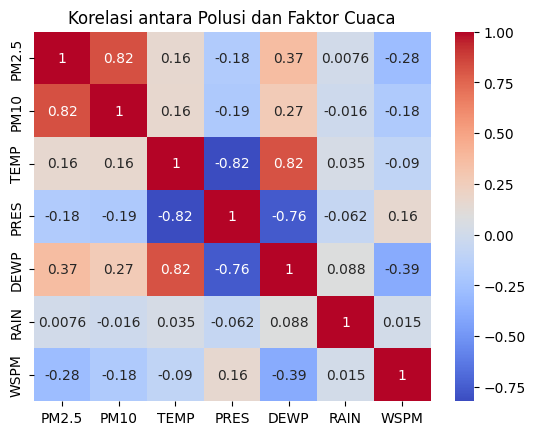

In [20]:
correlation = df[['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Polusi dan Faktor Cuaca')
plt.show()

### Insight
- bla
- bla

## QUESTION 2

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15964\3958606955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['O3_over'] = df['O3'] > 100


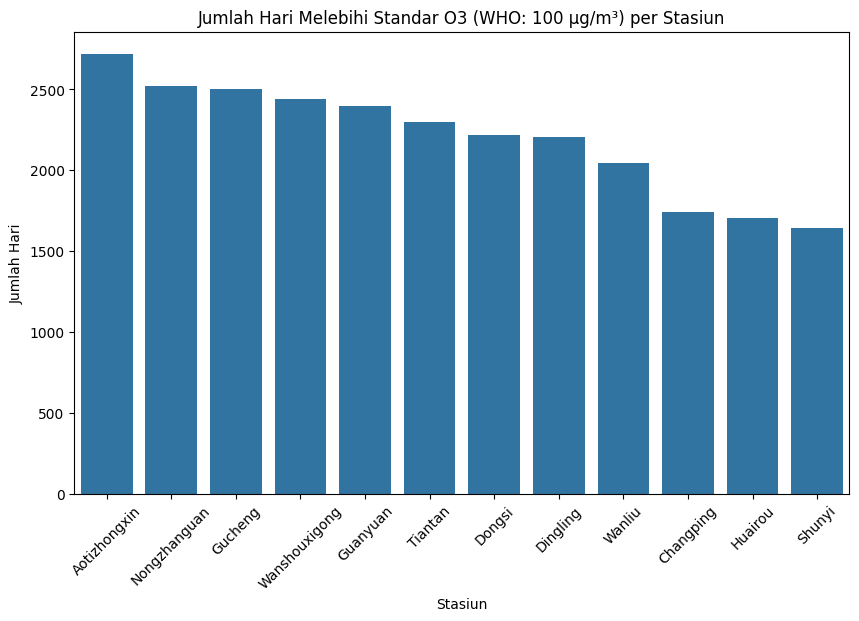

In [22]:
df_filtered = df[df['datetime'].dt.year >= last_three_years]
df_filtered = df[df['datetime'].dt.year >= last_three_years]
df_filtered['O3_over'] = df['O3'] > 100
station_o3_exceed = df_filtered.groupby('station')['O3_over'].sum().reset_index()
station_o3_exceed.columns = ['station', 'exceed_days']
o3_sorted = station_o3_exceed.sort_values(by='exceed_days', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=o3_sorted, x='station', y='exceed_days')
plt.title('Jumlah Hari Melebihi Standar O3 (WHO: 100 µg/m³) per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=45)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15964\1246162553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['datetime'].dt.year
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15964\1246162553.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  o3_exceed_trend = df_filtered[df['O3_over']].groupby(['year', 'month']).size().reset_index(name='exceed_days')


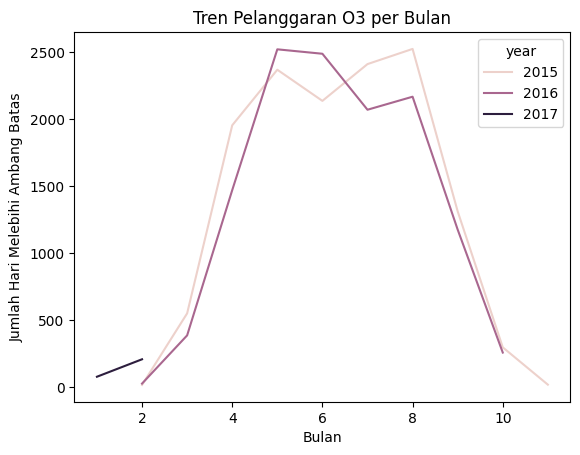

In [23]:
station_o3_exceed = df.groupby('station')['O3_over'].sum().reset_index()
station_o3_exceed.columns = ['station', 'exceed_days']


df_filtered['year'] = df_filtered['datetime'].dt.year
o3_exceed_trend = df_filtered[df['O3_over']].groupby(['year', 'month']).size().reset_index(name='exceed_days')
sns.lineplot(data=o3_exceed_trend, x='month', y='exceed_days', hue='year')
plt.title('Tren Pelanggaran O3 per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Hari Melebihi Ambang Batas')
plt.show()

### Insight
- Kebanyakan faktor cuaca tidak ada yang berhubungan langsung dengan tingkat PM10 & PM2.5
- PM10 naik mulai akhir bulan Februari dan memuncak pada bulan April
- PM2.5 naik drastis mulai akhir bulan Februari, lalu sempat turun sebelum memuncak lagi pada bulan Juli
- Seluruh Stasiun memliki jumlah pelanggaran tingkat O3 lebih dari 3000 selama 3 tahun terakhir dari data
- Level tertinggi O3 ada di tahunn 2016
- Data O3 berakhir pada bulan Februari

# CONCLUSION

## PERTANYAAN PERTAMA
PM10 & PM2.5 berada di level paling tinggi pada masa yang berbeda, yaitu PM10 pada musim Spring dan PM2.5 pada musim Summer, Lebih spesifiknya yaitu bulan April dan Juli <br>
Faktor cuaca tidak berkontribusi secara langsung terhadap berkembangnya polutan PM10 dan PM2.5

## PERTANYAAN KEDUA
Pada 3 tahun terakhir, stasiun Aotizhongxin adalah stasiun dengan jumlah pelanggaran batas O3 paling banyak, dengan jumlah lebih dari 2700 hari <br>
Namun, stasiun lain pun memiliki jumlah yang tidak kalah besar, semuanya lebih dari 1500